IRSA Explainer: https://wise2.ipac.caltech.edu/docs/release/allwise/expsup/sec2_1a.html

Stars within 100 pc of the Sun:  https://www.aanda.org/articles/aa/full_html/2021/05/aa39498-20/aa39498-20.html

LAMOST data cleaning procedure: https://iopscience.iop.org/article/10.3847/1538-4357/acaf5a/pdf
        

In [1]:
from astropy.io import fits
from astropy.table import Table, join, unique

from astropy.coordinates import SkyCoord
import astropy.units as u

from astropy.utils.metadata import merge

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


from multiprocessing import set_start_method

plt.style.use('stefan.mplstyle')

In [2]:
catalog = Table.read('data/all_wds.csv')
references = Table.read('data/table_irsa_catalog_search_results.csv')

# Stars from Gaia selected to be within 100pc of the Sun
# source: https://www.aanda.org/articles/aa/full_html/2021/05/aa39498-20/aa39498-20.html
allstars = Table.read('data/allstars.dat', format='ipac')

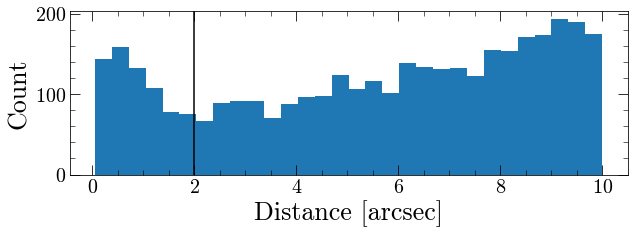

In [4]:
plt.figure(figsize = (10,3))
plt.hist(references['dist_x'], bins = 30)
plt.axvline(x = 2, c = 'k')
plt.xlabel('Distance [arcsec]')
plt.ylabel('Count')

references = references[references['dist_x'] < 2]

In [5]:
catalog = join(left=catalog, right=references, keys_left='CATALOGID', keys_right='catalogid_01', join_type="inner")

In [62]:
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky

QUERY = """select source_id, phot_g_mean_flux_error, phot_bp_mean_flux_error, phot_rp_mean_flux_error
            from gaiadr3.gaia_source
            where source_id in {}""".format(tuple(catalog['GAIA_DR3_SOURCE_ID']))
test = Gaia.launch_job(QUERY,dump_to_file=False).get_results()

#coord = SkyCoord(ra=catalog['RA'], dec=catalog['DEC'], unit=(u.degree, u.degree), frame='icrs')
#test = Gaia.query_object(coord, radius = 3*u.arcsec)
#j = Gaia.cone_search(coord, radius=u.Quantity(1.0, u.arcsec))

In [68]:
catalog[['CATALOGID','ra', 'dec']].write('temp.dat', format = 'ipac')

(array([ 64., 108.,  90.,  78.,  87.,  62.,  50.,  24.,  25.,  16.,  15.,
          6.,   9.,   8.,   5.,   5.,   3.,   8.,   2.,   2.,   1.,   1.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([ 0.56857198,  2.2074055 ,  3.84623901,  5.48507253,  7.12390604,
         8.76273956, 10.40157307, 12.04040658, 13.6792401 , 15.31807361,
        16.95690713, 18.59574064, 20.23457416, 21.87340767, 23.51224118,
        25.1510747 , 26.78990821, 28.42874173, 30.06757524, 31.70640876,
        33.34524227, 34.98407578, 36.6229093 , 38.26174281, 39.90057633,
        41.53940984, 43.17824336, 44.81707687, 46.45591038, 48.0947439 ,
        49.73357741, 51.37241093, 53.01124444, 54.65007796, 56.28891147,
        57.92774498, 59.5665785 , 61.20541201, 62.84424553, 64.48307904,
        66.12191256, 67.76074607, 69.39957958, 71.0384131 , 72.67724661,
       

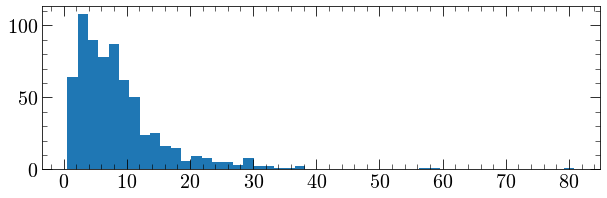

In [6]:
plt.figure(figsize=(10,3))
plt.hist(catalog['PARALLAX'])

In [7]:
catalog['abs_g'] = catalog['GAIA_G'] + 5 * np.log10(catalog['PARALLAX'] / 100)
catalog['abs_bp'] = catalog['GAIA_BP'] + 5 * np.log10(catalog['PARALLAX'] / 100)
catalog['abs_rp'] = catalog['GAIA_RP'] + 5 * np.log10(catalog['PARALLAX'] / 100)

catalog['abs_w1'] = catalog['w1mpro'] + 5 * np.log10(catalog['PARALLAX'] / 100)
catalog['abs_w2'] = catalog['w2mpro'] + 5 * np.log10(catalog['PARALLAX'] / 100)
catalog['abs_w3'] = catalog['w3mpro'] + 5 * np.log10(catalog['PARALLAX'] / 100)
#catalog['abs_w4'] = catalog['w4mpro'] + 5 * np.log10(catalog['PARALLAX'] / 100)

<ipython-input-7-4dde55568faa>:1: RuntimeWarning: divide by zero encountered in log10
  catalog['abs_g'] = catalog['GAIA_G'] + 5 * np.log10(catalog['PARALLAX'] / 100)
<ipython-input-7-4dde55568faa>:2: RuntimeWarning: divide by zero encountered in log10
  catalog['abs_bp'] = catalog['GAIA_BP'] + 5 * np.log10(catalog['PARALLAX'] / 100)
<ipython-input-7-4dde55568faa>:3: RuntimeWarning: divide by zero encountered in log10
  catalog['abs_rp'] = catalog['GAIA_RP'] + 5 * np.log10(catalog['PARALLAX'] / 100)
<ipython-input-7-4dde55568faa>:5: RuntimeWarning: divide by zero encountered in log10
  catalog['abs_w1'] = catalog['w1mpro'] + 5 * np.log10(catalog['PARALLAX'] / 100)
<ipython-input-7-4dde55568faa>:6: RuntimeWarning: divide by zero encountered in log10
  catalog['abs_w2'] = catalog['w2mpro'] + 5 * np.log10(catalog['PARALLAX'] / 100)
<ipython-input-7-4dde55568faa>:7: RuntimeWarning: divide by zero encountered in log10
  catalog['abs_w3'] = catalog['w3mpro'] + 5 * np.log10(catalog['PARALLAX'

Text(0, 0.5, 'W1 - W2')

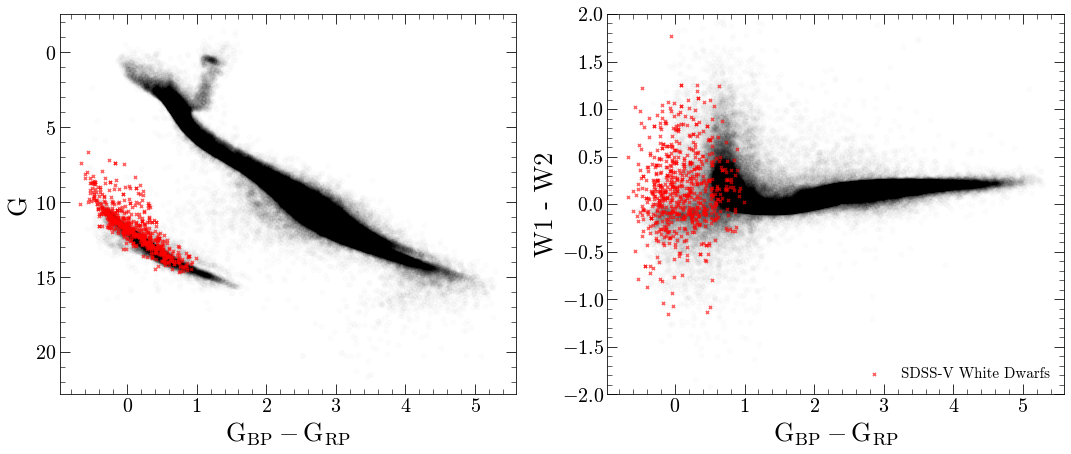

In [22]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)

plt.scatter(allstars['abs_bp'] - allstars['abs_rp'], allstars['abs_g'], c = 'k', alpha = 0.01)
plt.scatter(catalog['abs_bp'] - catalog['abs_rp'], catalog['abs_g'],  c = 'red', alpha = 0.6, marker = 'x', s = 10, label = 'SDSS-V White Dwarfs')

plt.xlabel(r'$G_{BP} - G_{RP}$')
plt.ylabel('G')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)

plt.scatter(allstars['abs_bp'] - allstars['abs_rp'], allstars['abs_w1'] - allstars['abs_w2'], c = 'k', alpha = 0.01)
plt.scatter(catalog['abs_bp'] - catalog['abs_rp'], catalog['abs_w1'] - catalog['abs_w2'], c = 'red', alpha = 0.6, marker = 'x', s = 10, label = 'SDSS-V White Dwarfs')

plt.legend(framealpha = 0)

plt.ylim(-2,2)

plt.xlabel(r'$G_{BP} - G_{RP}$')
plt.ylabel('W1 - W2')

CATALOGID,RA,DEC,GAIA_DR3_SOURCE_ID,SNR_SnowWhite,WD_TYPE,Teff_SnowWhite,E_Teff_SnowWhite,Logg_SnowWhite,E_Logg_SnowWhite,SPEC_FILE,SN_MEDIAN_ALL,MJD,GAIA_BP,GAIA_RP,GAIA_G,PARALLAX,cntr_01,dist_x,pang_x,catalogid_01,ra_01,dec_01,designation,ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,w3mpro,w3sigmpro,w3snr,w3rchi2,w4mpro,w4sigmpro,w4snr,w4rchi2,nb,na,w1sat,w2sat,w3sat,w4sat,pmra,sigpmra,pmdec,sigpmdec,cc_flags,ext_flg,var_flg,ph_qual,moon_lev,w1nm,w1m,w2nm,w2m,w3nm,w3m,w4nm,w4m,abs_g,abs_bp,abs_rp,abs_w1,abs_w2,abs_w3
int64,float64,float64,int64,float64,str2,float64,float64,float64,float64,str40,float64,int64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,str19,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,str5,float64,float64,float64,str5,float64,float64,str6,str5,str5,str9,int64,int64,float64,float64,float64,str5,str6,str5,str6,str5,str4,int64,str4,str4,int64,int64,int64,int64,int64,int64,int64,str4,str4,float64,float64,float64,float64,float64,float64
4264177155,303.8612060546875,55.52061080932617,2186145882748096128,35.749427795410156,DA,22851.359375,148.68246459960938,7.941424369812012,1.655879350437317e-05,spec-015383-59363-4264177155.fits,24.833538055419922,59363,16.71150016784668,17.021299362182617,16.862600326538086,5.3669538497924805,6671,1.814874,-88.60263,4264177155,303.86120605,55.520610809,J201526.47+553114.2,303.8603158,55.5206231,0.2752,0.2665,-0.0842,17.134,0.089,12.2,0.9207,17.808,0.483,2.2,0.9087,12.787,0.371,2.9,0.9846,9.110,null,1.5,9.653E-01,1,0,0.0,0.0,0.0,0.000,336,1211,366,1163,d000,0,nnnn,ACCU,0,15,66,0,66,0,41,0,41,10.5112396306548,10.360139471963393,10.66993866629933,10.782639304116714,11.456639304116713,6.435639304116715
4265452143,302.2838134765625,55.12663269042969,2185843104732907648,55.3599967956543,DA,23441.380859375,30.299867630004883,7.804965496063232,0.0001336700952379033,spec-015383-59363-4265452143.fits,37.74662399291992,59363,15.45479965209961,15.815600395202637,15.617199897766113,8.800559043884277,6833,0.67663,60.969132,4265452143,302.28381348,55.12663269,J200908.18+550736.2,302.2841009,55.1267239,0.1595,0.1559,-0.0356,16.455,0.053,20.4,0.946,17.182,null,2.0,0.9503,13.215,null,0.1,0.8939,9.752,null,-0.3,1.014E+00,1,0,0.0,0.0,0.0,0.000,-986,596,-135,578,h000,0,1nnn,AUUU,0,35,67,1,67,0,38,0,38,10.339751202813815,10.177350957147311,10.538151700250339,11.1775513050477,11.9045513050477,7.937551305047703
4265475929,303.101318359375,56.01457214355469,2186361490100078592,12.467440605163574,DA,20931.833984375,68.36174011230469,8.005803108215332,0.0005935541703365743,spec-015383-59363-4265475929.fits,8.720146179199219,59363,18.599899291992188,18.79640007019043,18.752599716186523,2.960577964782715,4645,0.132643,170.533902,4265475929,303.10131836,56.014572144,J201224.31+560052.3,303.1013292,56.0145358,0.1687,0.164,-0.0509,16.513,0.061,17.8,1.082,16.179,0.113,9.6,0.8426,13.243,null,0.2,1.003,9.247,null,0.5,9.181E-01,1,0,0.0,0.0,0.0,0.000,-220,623,24,603,0000,0,1nnn,ABUU,0,37,68,8,68,0,42,0,42,11.109482228260703,10.956781804066367,11.153282582264609,8.86988251207418,8.535882512074178,5.59988251207418
4268480120,285.7948303222656,57.158226013183594,2153441660993174912,16.078054428100586,DA,43071.3984375,83.2859878540039,7.69594144821167,0.0010700039565563202,spec-015387-59367-4268480120.fits,3.529602527618408,59367,19.38249969482422,20.054800033569336,19.63159942626953,1.2653945684432983,5717,1.449453,-81.963455,4268480120,285.79483032,57.158226013,J190310.58+570929.8,285.7940952,57.1582823,0.2716,0.2727,-0.0877,17.756,0.093,11.7,0.9298,17.257,0.208,5.2,0.85,13.014,null,1.2,0.895,9.689,null,0.5,1.009E+00,1,0,0.002,0.0,0.0,0.000,478,1438,966,1442,0000,0,nnnn,ABUU,0,9,123,0,123,0,71,0,71,10.142729256116388,9.893629524671075,10.565929863416192,8.267129829846857,7.768129829846858,3.525129829846856
4268491807,284.7991027832031,57.272132873535156,2153501206420126592,6.882039546966553,DA,12200.0,100.026840

In [ ]:
import sys
sys.path.append('../corv/src')

import pyphot
from pyphot import unit
import corv

base_wavl, tremblay, table = corv.utils.build_montreal_da(path = '/home/sarsene1/corv/src/corv/models/montreal_da', flux_unit = 'flam')

c = 2.998e10
k = 1.38e-16
h = 6.626e-27
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
speed_light = 299792458 #m/s
mass_sun = 1.9884e30
newton_G = 6.674e-11
pc_to_m = 3.086775e16
radius_sun = 6.957e8

def mag_to_flux_spec(mag, filt, e_mag = None):
    if e_mag is not None:
        return (10**( (mag + filt.Vega_zero_mag) / -2.5 ), np.sqrt((-0.921034 * 10**(-0.4 * (mag + filt.Vega_zero_mag)) * e_mag)**2 ))
    else:
        return 10**( (mag + filt.Vega_zero_mag) / -2.5 )

def template(teff, logg, radius, distance):
    fl = tremblay((teff, logg))
    
    radius = radius * radius_sun # Rsun to meter
    distance = distance * pc_to_m # Parsec to meter
    
    fl = 4*np.pi*(radius / distance)**2 * fl
    return fl
    

def get_model_flux_gaia_spec(params):
    teff, logg, radius, distance = params['teff'], params['logg'], params['radius'], params['distance']
    
    fl = template(teff, logg, radius, distance) 
            
    flux = np.array([filters[i].get_flux(base_wavl * unit['angstrom'], fl * unit['erg/s/cm**2/angstrom'], axis = 1).to('erg/s/cm**2/angstrom').value for i in range(len(filters))])
    #mag = np.array([-2.5*np.log10(filters[i].get_flux(base_wavl * unit['AA'], fl * unit['erg/s/cm**2/AA'], axis = 1).value) - filters[i].Vega_zero_mag for i in range(len(filters))])
    return flux
    

def residual_gaia(params, obs_flux = None, e_obs_flux = None):
    model_flux = get_model_flux_gaia_spec(params)

    chisquare = ((model_flux - obs_flux) / e_obs_flux)**2
    
    #chisquare[np.isnan(chisquare)] = 1e8
    return chisquare

def get_parameters_gaia(obs_flux, e_obs_flux, id_ = None, floor_error = 0.02, make_plot = False, vary_logg = False, p0 = [10000, 8, 0.01, 100]):         
    params = lmfit.Parameters()

    params.add('teff', value = p0[0], min = 4001, max = 35000, vary = True)
    params.add('logg', value = p0[1], min=5, max=9, vary=False)
    params.add('radius', value = p0[2], min = 0.000001, max = 0.05, vary = True)
    params.add('distance', value = p0[3], min = 1, max = 2000, vary = False)
            
    result = lmfit.minimize(residual_gaia, params, kws = dict(obs_flux = obs_flux, e_obs_flux = e_obs_flux), method = 'leastsq')
            
    return result

2691


Text(0, 0.5, 'Flux $[erg/s/cm^2/\\AA]$')

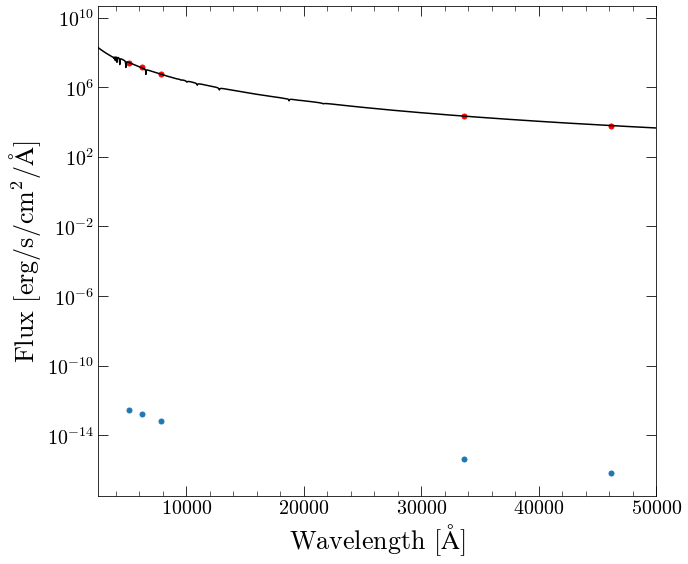

In [44]:


i = 0

lib = pyphot.get_library()
filters = [lib['Gaia_G'], lib['Gaia_BP'], lib['Gaia_RP'], lib['WISE_RSR_W1'], lib['WISE_RSR_W2']]

fl = tremblay((catalog['Teff_SnowWhite'][i], catalog['Logg_SnowWhite'][i]))
print(len(fl))

wavl = [filters[i].lpivot.to('angstrom').value for i in range(len(filters))]
phot_flux = [filters[i].get_flux(base_wavl * unit['AA'], fl * unit['erg/s/cm**2/AA'], axis = 1).value for i in range(len(filters))]
phot_mag = np.array([-2.5*np.log10(filters[i].get_flux(base_wavl * unit['AA'], fl * unit['erg/s/cm**2/AA'], axis = 1).value) \
                     - filters[i].Vega_zero_mag for i in range(len(filters))])

obs_flux = np.array([mag_to_flux_spec(catalog['abs_g'][i], filters[0]),
                    mag_to_flux_spec(catalog['abs_bp'][i], filters[1]),
                    mag_to_flux_spec(catalog['abs_rp'][i], filters[2]),
                    mag_to_flux_spec(catalog['abs_w1'][i], filters[3]),
                    mag_to_flux_spec(catalog['abs_w2'][i], filters[4])])


plt.figure(figsize = (10,9))

plt.plot(base_wavl, fl, c = 'k')
plt.scatter(wavl, phot_flux, c = 'r')
plt.scatter([filters[j].lpivot.to('angstrom').value for j in range(len(filters))], obs_flux)

plt.yscale('log')
plt.xlim(2500,50000)
#plt.ylim(10**3,10**7)

plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux $[erg/s/cm^2/\AA]$')

